Animations of how sine waves (Fourier components) add to form more complicated waveforms

In [1]:
# Use Python 2.7

import sys
import os
sys.path.append('../sms-tools-enhanced/software/models/')
import scipy
from scipy.fftpack import fft
from utilFunctions import wavread
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from DFT_functions import IDFT
from DFT_functions import DFT
%matplotlib inline

In [2]:
# Set up animation display
# Citation: Code in this cell from http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/

from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=2, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

# Violin G5 Note

In [3]:
# Load wave file into array x
#inputFile = '../../sounds/flute-A4.wav'
inputFile = '/Users/shaomintan/Desktop/sounds/violin_G5_1_pianissimo_arco-normal.wav'
(fs, x) = wavread(inputFile)

/Users/shaomintan/anaconda/lib/python2.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


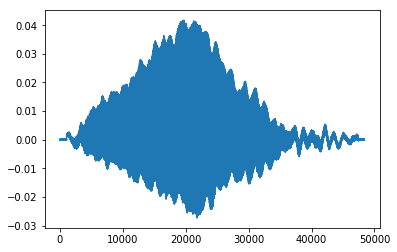

In [4]:
plt.plot(x)

In [5]:
# Pick out segment

length = 225
segment = x[15075:15075+length]

In [6]:
# Calculate dc offset
X = DFT(segment)
dc = abs(X[0])/length
dc

0.0029464604953924815

In [7]:
# Correct for dc offset
segment = segment - dc

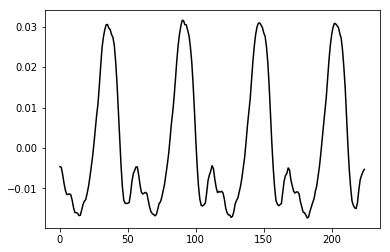

In [8]:
# Plot segment

plt.plot(segment,'k')
ax = [0,200,-0.02,0.04]
#plt.savefig("waveform.jpg")
#plt.axis(ax)

(-11.25, 236.25, -0.01973316688090563, 0.034012983180582525)

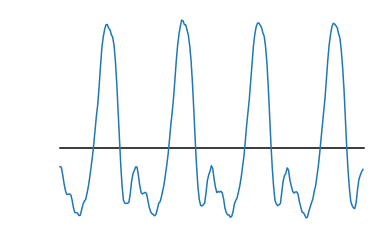

In [9]:
# Plot segment with reference zero line

fig, ax = plt.subplots()
plt.plot([0, length], [0, 0], 'k-')
plt.plot(segment)

ax.axis("off")
#plt.savefig("waveform.jpg")
#plt.axis(ax)

[0, 50, 0, 3]

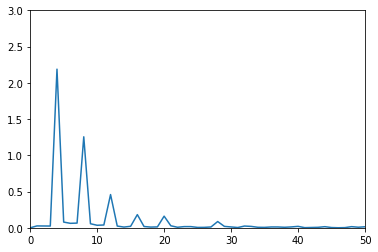

In [28]:
# Plot the DFT, x-axis is mode number
X = DFT(segment)
plt.plot(abs(X))
plt.axis([0,50,0,3])

In [31]:
# Print amplitudes of first 10 harmonics:
for i in range (1,11):
    print(abs(X[i*4]))        # Only print every 4th value, since those correspond to the violin note's harmonics

2.18871753962
1.25554078105
0.458529202565
0.181729535978
0.160562781817
0.0163764198513
0.086306652341
0.0240415060998
0.0114718089595
0.0197500225262


In [11]:
# Nominal frequency of G5 is 784, set up x axis ticks to reflect this
xaxis = 0.25*784*np.arange(225)

[0, 10000, 0, 3]

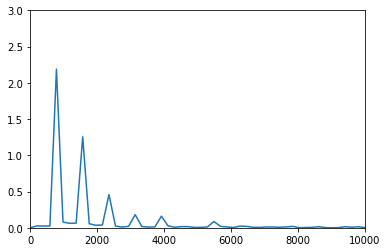

In [12]:
# Plot the DFT, x-axis is frequency
plt.plot(xaxis,abs(X))
plt.axis([0,10000,0,3])

### Animations

In [13]:
# Animation of how sine waves add to form violin waveform

kf = 4      # Plot only every 4 modes
            # i.e. only the harmonics of the note, since our segment contains 4 repetitions of the wave
Xs = np.zeros(X.size, dtype=np.complex)  # Set up container for DFT
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97, wspace=None, hspace=None)
ax = plt.axes(xlim = (0,length), ylim = (-0.025, 0.035))
line, = ax.plot([], [], lw=1, color='r')
line2, = ax.plot([], [], lw=1, color='b')
line3, = ax.plot([], [], lw=1, color='k')
ax.axis("off")
lines = []
lines.append(line)
lines.append(line2)
lines.append(line3)

def init():
    line.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    return lines

def animate(i):
    Xs[kf*i] = X[kf*i]       # Only calculate DFT for harmonics of fundamental (i.e. every 4 bins)
    Xs[-kf*i] = X[-kf*i]     # The rest remain at zero
    ys = IDFT(Xs)            # Inverse Fourier transform
    y3 = 0
    #ys = np.arange(length)
    xs = np.arange(length)
    line.set_data(xs,ys)        # Fourier sum
    line2.set_data(xs,segment)  # Original waveform
    line3.set_data(xs,y3)       # Reference line at zero
    return lines
    #plt.plot(ys,'r')
    #plt.plot(segment,'b')
    #plt.axis(ax)

ann = animation.FuncAnimation(fig, animate, init_func=init, frames = 8, interval = 1000, blit=True)
display_animation(ann)
#ann.save('violin_fourier_r.gif', dpi = 80, writer = 'imagemagick')
#ann.save('violin_fourier.mp4', writer = 'ffmpeg')

/Users/shaomintan/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [14]:
# Same animation as above, but add a plot that shows individual modes as they are added

kf = 4
Xs = np.zeros(X.size, dtype=np.complex)     # Container for sum of DFT
XXs = np.zeros(X.size, dtype=np.complex)    # Container for current DFT
fig = plt.figure(figsize=(6,9))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
#plt.tight_layout(h_pad=20.0)

ax1.set_xlim([0, length])
ax1.set_ylim([-0.03, 0.04])
ax2.set_xlim([0, length])
ax2.set_ylim([-0.03, 0.04])
#ax1 = plt.axes(xlim = (0,length), ylim = (-0.03, 0.04))
ax1.axis("off")
#ax2 = plt.axes(xlim = (0,length), ylim = (-0.03, 0.04))
ax2.axis("off")
#ax1.set_title('Sum of sine waves so far:')
#ax2.set_title('Current sine wave being added:')

line, = ax1.plot([], [], lw=1, color='r')
line2, = ax1.plot([], [], lw=1, color='b')
line3, = ax1.plot([], [], lw=1, color='k')
lines = []
lines.append(line)
lines.append(line2)
lines.append(line3)

linea, = ax2.plot([], [], lw=1, color='green')
#line2a, = ax2.plot([], [], lw=1, color='b')
line3a, = ax2.plot([], [], lw=1, color='k')
#linesa = []
lines.append(linea)
#lines.append(line2a)
lines.append(line3a)

def init():
    line.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    return lines

def animate(i):
    if i >= 11:
        i = i-1
    Xs[kf*i] = X[kf*i]                            # Only calculate DFT for harmonics of fundamental (i.e. every 4 bins)
    Xs[-kf*i] = X[-kf*i]                          # The rest remain at zero
    ys = IDFT(Xs)                                 # Inverse Fourier transform
    y3 = 0
    XXs = np.zeros(X.size, dtype=np.complex)      # Reset current mode to zero
    XXs[kf*i] = X[kf*i]                           # Only set current harmonic DFT
    XXs[-kf*i] = X[-kf*i]
    yys = IDFT(XXs)                               # Inverse Fourier transform

    xs = np.arange(length)
    line.set_data(xs,ys)          # Fourier sum
    line2.set_data(xs,segment)    # Original waveform
    line3.set_data(xs,y3)         # Reference line at zero
    
    linea.set_data(xs,yys)        # Current mode
    #line2a.set_data(xs,segment)
    line3a.set_data(xs,y3)        # Reference line at zero
    ax1.set_title('Sum of ' + str(i) + ' sine waves:', color='r')
    ax2.set_title('Sine wave #' + str(i) + ':', color='green')
    return lines

ann = animation.FuncAnimation(fig, animate, init_func=init, frames = 12, interval = 1200, blit=True)

#ann.append(animation.FuncAnimation(fig, animate, init_func=init, frames = 8, interval = 1000, blit=True))
#ann.append(animation.FuncAnimation(fig, animate2, init_func=init2, frames = 8, interval = 1000, blit=True))
display_animation(ann)
#ann.save('violin_fourier2.mp4', writer = 'ffmpeg')

In [15]:
# Same animation as above, but with plots arranged horizontally

kf = 4
Xs = np.zeros(X.size, dtype=np.complex)
XXs = np.zeros(X.size, dtype=np.complex)
fig = plt.figure(figsize=(16,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.set_xlim([0, length])
ax1.set_ylim([-0.03, 0.04])
ax2.set_xlim([0, length])
ax2.set_ylim([-0.03, 0.04])

ax1.axis("off")
ax2.axis("off")

line, = ax1.plot([], [], lw=1, color='r')
line2, = ax1.plot([], [], lw=1, color='b')
line3, = ax1.plot([], [], lw=1, color='k')
lines = []
lines.append(line)
lines.append(line2)
lines.append(line3)

linea, = ax2.plot([], [], lw=1, color='green')
line3a, = ax2.plot([], [], lw=1, color='k')
lines.append(linea)
lines.append(line3a)

def init():
    line.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    return lines
def animate(i):
    if i >= 11:
        i = i-1
    Xs[kf*i] = X[kf*i]                        # Only calculate DFT for harmonics of fundamental (i.e. every 4 bins)
    Xs[-kf*i] = X[-kf*i]                      # (The rest remain at zero)
    ys = IDFT(Xs)                             # Inverse Fourier transform
    y3 = 0
    XXs = np.zeros(X.size, dtype=np.complex)  # Reset current mode to zero
    XXs[kf*i] = X[kf*i]                       # Only set current harmonic DFT
    XXs[-kf*i] = X[-kf*i]
    yys = IDFT(XXs)                           # Inverse Fourier transform

    xs = np.arange(length)
    line.set_data(xs,ys)         # Fourier sum
    line2.set_data(xs,segment)   # Original waveform
    line3.set_data(xs,y3)        # Reference line at zero
    
    linea.set_data(xs,yys)       # Current mode
    line3a.set_data(xs,y3)       # Reference line at zero
    ax1.set_title('Sum of ' + str(i) + ' sine waves:', color='r')
    ax2.set_title('Sine wave #' + str(i) + ':', color='green')
    return lines

ann = animation.FuncAnimation(fig, animate, init_func=init, frames = 12, interval = 1200, blit=True)

display_animation(ann)
#ann.save('violin_fourier3.mp4', writer = 'ffmpeg')

<function matplotlib.pyplot.show>

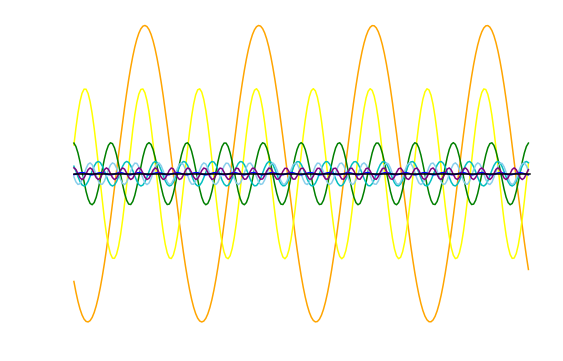

In [16]:
# Plot of Fourier modes

kf = 4
Xsum = np.zeros(X.size, dtype=np.complex)
colorarray = ['orange','yellow','green','c','skyblue','blue','purple']
fig, ax = plt.subplots(figsize=(9,6))
for i in range(1,8):
    Xs = np.zeros(X.size, dtype=np.complex)
    Xs[kf*i] = X[kf*i]
    Xs[-kf*i] = X[-kf*i]
    Xsum[kf*i] = X[kf*i]
    Xsum[-kf*i] = X[-kf*i]
    ys = IDFT(Xs)
    ysum = IDFT(Xsum)
    plt.plot(ys,colorarray[i-1])
plt.plot([0, 225], [0, 0], 'k-')
#plt.plot(ysum,'r')
#plt.axis(ax)
ax.axis("off")
plt.savefig("sines.jpg")
plt.show

# Sawtooth Wave

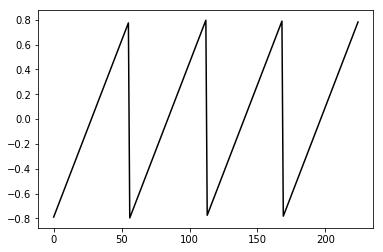

In [17]:
# Load wave file and plot

inputFile = '/Users/shaomintan/Desktop/sounds/sawtooth_G5.wav'
(fs, x) = wavread(inputFile)
sawtooth = np.array([])
length = 225
for i in range(15000-9,15000-9+length):
    sawtooth = np.append(sawtooth,[x[i]])
plt.plot(sawtooth,'k')

[0, 100, 0, 60]

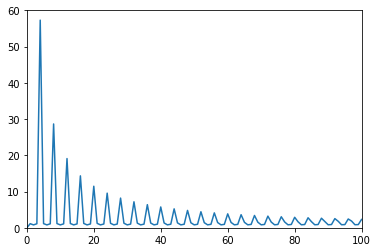

In [18]:
# Plot DFT
X = DFT(sawtooth)
plt.plot(abs(X))
plt.axis([0,100,0,60])

In [19]:
# Animation of modes summing to form sawtooth

kf = 4                  # Plot only every 4 modes
                        # i.e. only the harmonics of the note, since our segment contains 4 repetitions of the wave
xs = np.arange(length)  # Set up x-axis
Xs = np.zeros(length, dtype=np.complex) # Container to store DFT
fig = plt.figure()
ax = plt.axes(xlim = (0,length), ylim = (-1, 1))
ax.axis("off")
line, = ax.plot([], [], lw=1, color='r')
line2, = ax.plot([], [], lw=1, color='b')
line3, = ax.plot([], [], lw=1, color='k')
lines = []
lines.append(line)
lines.append(line2)

def init():
    line.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    return lines

def animate(i):
    Xs[kf*i] = X[kf*i]          # Only add harmoncis of fundamental, i.e. every 4th mode. Rest left at zero.
    Xs[-kf*i] = X[-kf*i]        # Sawtooth is perfectly harmonic, unlike the recorded violin note which has inharmonic components
    ys = IDFT(Xs)               # Inverse Fourier transform
    y3 = 0                      # Reference zero line
    
    line.set_data(xs,ys)        # Fourier sum
    line2.set_data(xs,sawtooth) # Original segment
    line3.set_data(xs,y3)       # Reference zero line
    return lines

ann = animation.FuncAnimation(fig, animate, init_func=init, frames = 50, interval = 1000, blit=True)
display_animation(ann)
#ann.save('sawtooth_fourier.mp4', writer = 'ffmpeg')

# Playing Around

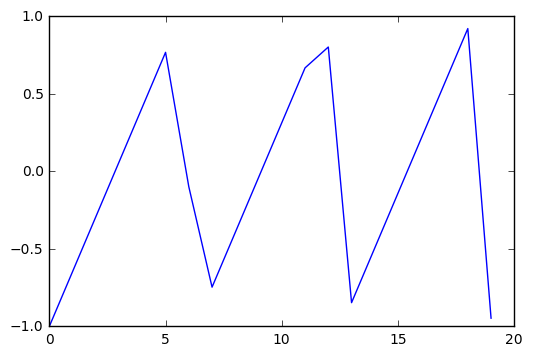

In [72]:
t = np.arange(20)
saw = scipy.signal.sawtooth(t,0.9)
plt.plot(saw)